In [19]:
pip install imbalanced-learn

     |████████████████████████████████| 206 kB 437 kB/s eta 0:00:01
     |████████████████████████████████| 7.2 MB 180 kB/s eta 0:00:01
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.22.1
    Uninstalling scikit-learn-0.22.1:
      Successfully uninstalled scikit-learn-0.22.1
You should consider upgrading via the '/Users/irfanmahir/opt/anaconda3/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [1]:
# import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import imblearn as imb

In [2]:
# creating data frame and reading head values
framingham = pd.read_csv('/Users/irfanmahir/Downloads/FRAMINGHAM_teaching_2019a/csv/frmgham2.csv')
framingham.head()

,RANDID,SEX,TOTCHOL,AGE,SYSBP,DIABP,CURSMOKE,CIGPDAY,BMI,DIABETES,...,CVD,HYPERTEN,TIMEAP,TIMEMI,TIMEMIFC,TIMECHD,TIMESTRK,TIMECVD,TIMEDTH,TIMEHYP
0,2448,1,195.0,39,106.0,70.0,0,0.0,26.97,0,...,1,0,8766,6438,6438,6438,8766,6438,8766,8766
1,2448,1,209.0,52,121.0,66.0,0,0.0,NaN,0,...,1,0,8766,6438,6438,6438,8766,6438,8766,8766
2,6238,2,250.0,46,121.0,81.0,0,0.0,28.73,0,...,0,0,8766,8766,8766,8766,8766,8766,8766,8766
3,6238,2,260.0,52,105.0,69.5,0,0.0,29.43,0,...,0,0,8766,8766,8766,8766,8766,8766,8766,8766
4,6238,2,237.0,58,108.0,66.0,0,0.0,28.50,0,...,0,0,8766,8766,8766,8766,8766,8766,8766,8766


## Data Visualisation

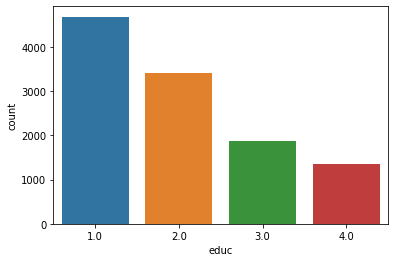

In [3]:
# count plot with variable 'education'
sns.countplot(x='educ',data=framingham)

## Data Preprocessing

In [4]:
# checking for null values and droping them
framingham.isnull().any()
framingham = framingham.dropna()
framingham['MI_FCHD'].value_counts()

0    1929
1     307
Name: MI_FCHD, dtype: int64

## Train-Test split

In [5]:
from sklearn.model_selection import train_test_split
X = framingham.drop('MI_FCHD',axis=1)
y = framingham['MI_FCHD']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.35)

In [29]:
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

## Over and under sampling

In [30]:
oversample = RandomOverSampler(sampling_strategy='minority')
X_over, y_over = oversample.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_over,y_over,test_size=0.35)

## fitting data to pipeline

In [31]:
#steps = [('under', RandomUnderSampler()), ('model', DecisionTreeClassifier())]
pipeline = Pipeline([('under', RandomUnderSampler()), ('model', DecisionTreeClassifier())])

In [32]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('under', RandomUnderSampler()),
                ('model', DecisionTreeClassifier())])

## predictions

In [33]:
pipepred = pipeline.predict(X_test)

## Evaluations

In [34]:
from sklearn.metrics import classification_report,accuracy_score
print(classification_report(y_test,pipepred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       686
           1       0.99      1.00      0.99       665

    accuracy                           0.99      1351
   macro avg       0.99      0.99      0.99      1351
weighted avg       0.99      0.99      0.99      1351



In [35]:
accuracy_score(y_test,pipepred)

0.9940784603997039